# MODEL ANALYSIS

In [3]:
from time import time
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
% matplotlib inline

## LOAD TEST SET

In [4]:
df = pd.read_csv('data/wheat-2014-supervised.csv')
drop_cols = ['CountyName','State','Date', 'precipTypeIsOther'] + ['Latitude','Longitude'] 
df.drop(drop_cols,axis=1,inplace=True)
df.dropna(inplace=True)

In [45]:
with open('pickles/SBS_feat_set.plk','rb') as f:
    sbs_dict = pickle.load(f)
# with open('pickles/trained_model2_Linear.plk','rb') as f:
#     LR_model = pickle.load(f)
with open('pickles/trained_model2_Random Forest.plk','rb') as f:
    RF_model = pickle.load(f)
with open('pickles/trained_model2_Gradient Boost.plk','rb') as f:
    GB_model = pickle.load(f)
# with open('pickles/predictions.plk','rb') as f:
#     y_preds = pickle.load(f)    

In [46]:
models = {}
# models['Linear'] = LR_model
models['Random Forest'] = RF_model
models['Gradient Boost'] = GB_model

In [ ]:
y_pred = {}
for name,model in models.items():
    if name == 'Random Forest':
        k = 4
    else:
        k = 8
    X_test = np.matrix(df.ix[:,:-1])[:,list(sbs_dict[name][k])]
    y_true = np.array(df.ix[:,-1])
    y_pred[name] = [model.predict(X_test[i]) for i in range(len(X_test))]

with open('pickles/predictions2.plk','wb') as f:
    pickle.dump(y_pred,f)   

In [1]:
def model_eval(name,y_true,y_pred):  
    figs,axs = plt.subplots(ncols=2,nrows=1)
    figs.set_figwidth(15)
    figs.set_figheight(10)   
    ax = axs[0]
    ax.scatter(y_pred,abs(y_pred)-abs(y_true))
#     ax.plot([0,78],[0,78])
#     ax.set_xlim([0,80])
#     ax.set_ylim([0,80])
    ax.set_title('Residual VS. Predicted (MODEL:{})'.format(name))
    ax.set_xlabel('Residual')
    ax.set_ylabel('Predicted Yield')
    ax.grid(True)
    
    ax = axs[1]
    ax.scatter(y_true,y_pred)
#     ax.plot([0,78],[0,78])
#     ax.set_xlim([0,80])
#     ax.set_ylim([0,80])
    ax.set_title('Predicted VS. True (MODEL:{})'.format(name))
    ax.set_xlabel('True Yield')
    ax.set_ylabel('Predicted Yield')
    ax.grid(True)

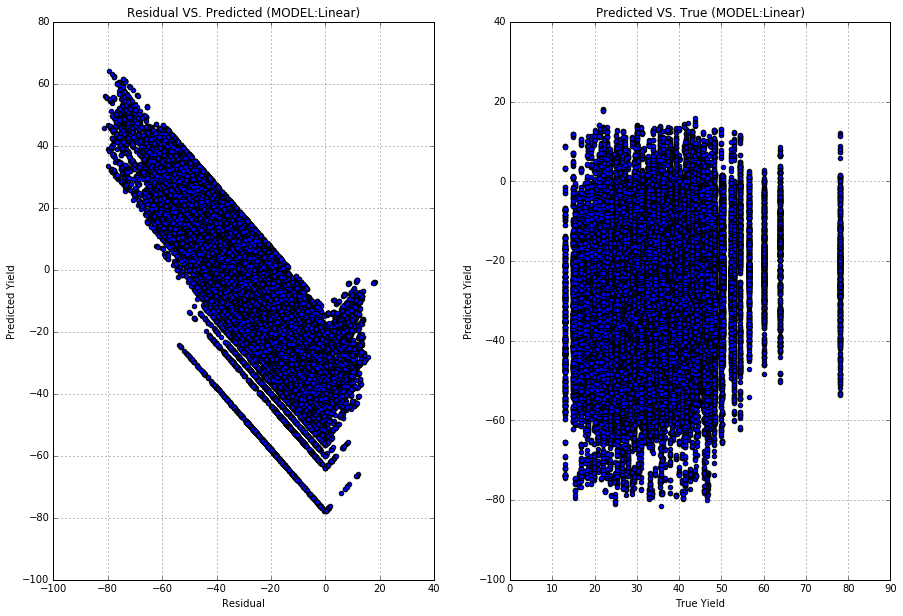

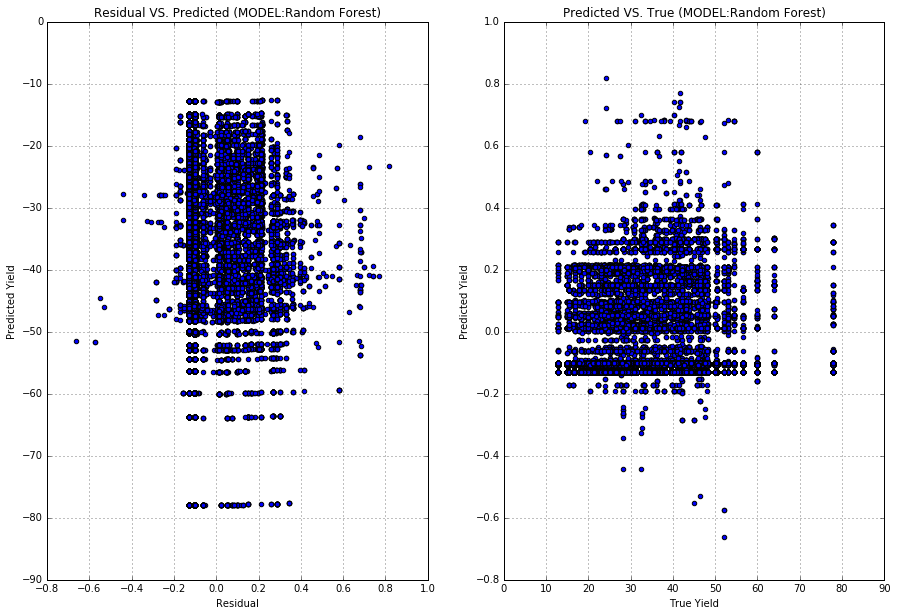

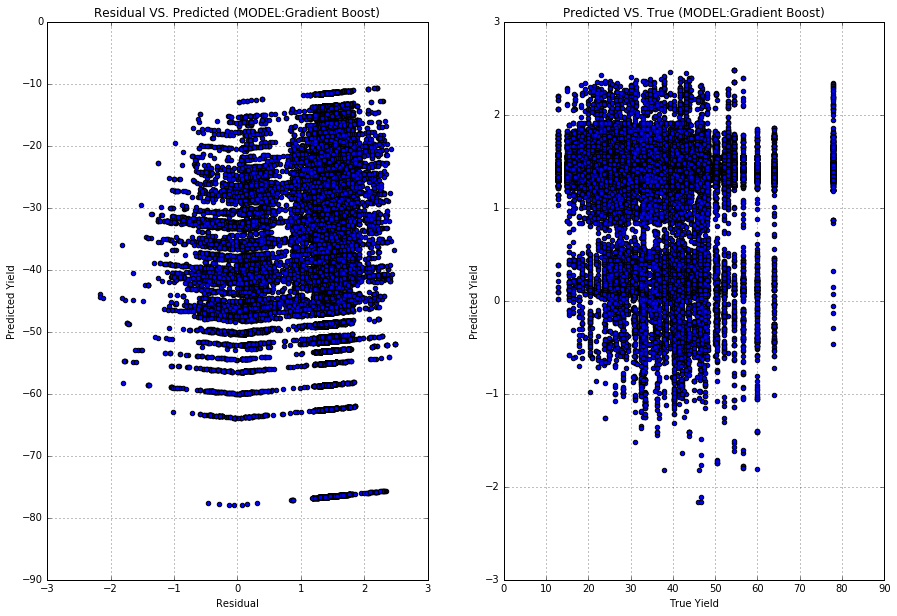

In [38]:
names = ['Linear','Random Forest','Gradient Boost']
for name in names:
    y_true = np.array(df.ix[:,-1]).reshape(len(df),1)[:100000]
    y_pred = np.array(y_preds[name])[:100000]
    model_eval(name,y_true,y_pred)

In [5]:
with open('pickles/predictions2.plk','rb') as f:
    y_preds = pickle.load(f)  

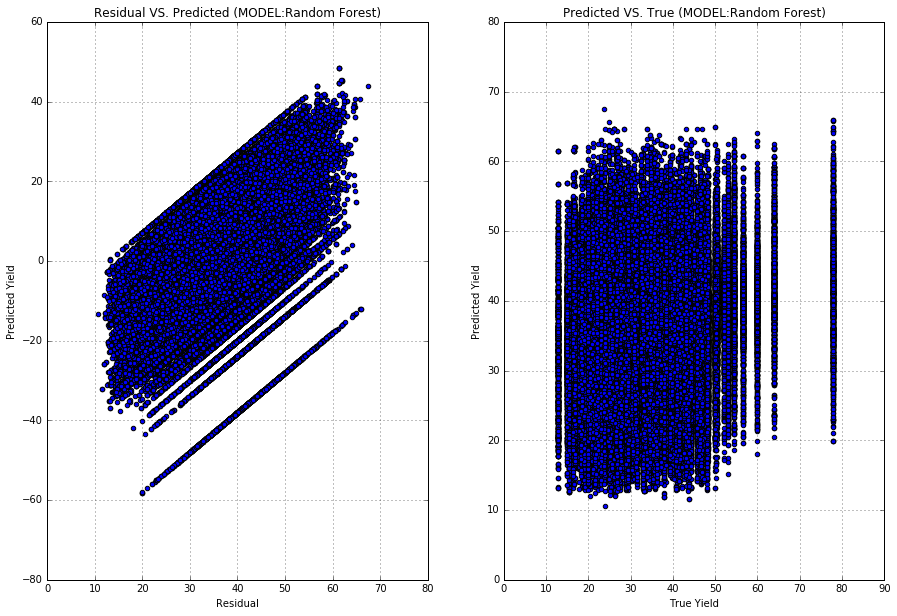

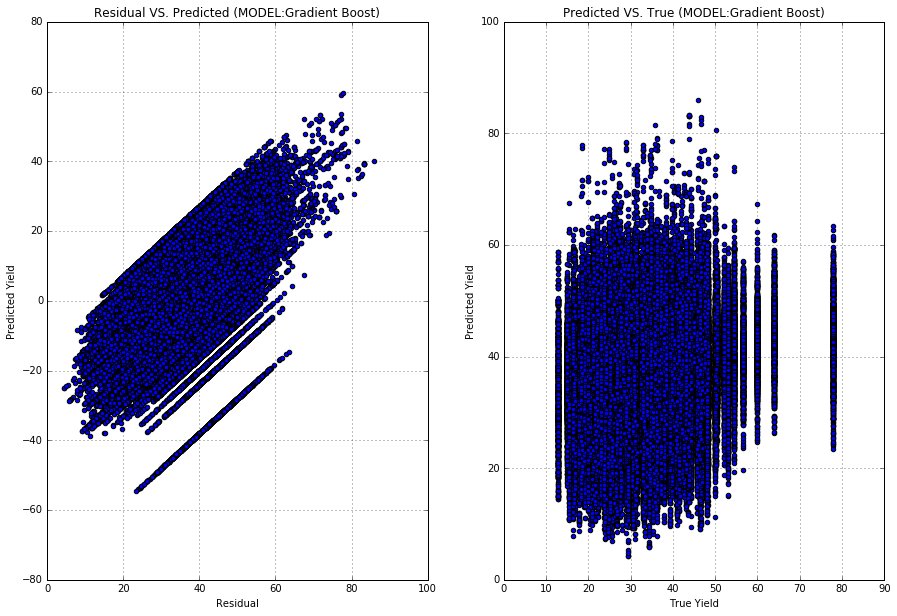

In [7]:
names = ['Random Forest','Gradient Boost']
for name in names:
    y_true = np.array(df.ix[:,-1]).reshape(len(df),1)#[:100000]
    y_pred = np.array(y_preds[name])#[:100000]
    model_eval(name,y_true,y_pred)

In [1]:
# graphs for LR, RF, GB

# ensemble vote? (basically pipeline predictions and then average?)

# final ensemble graph

# write in some analysis stuff......

In [ ]:
# don't forget to do...
- README.md
- push project to repo
- push cookbook stuff
- coursera stuff lectures
- s3 bucket (click rate stuff!)
- set up solid AWS image